In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import math
import warnings
warnings.filterwarnings('ignore')

#import seaborn as sns
#import plotly.express as px

#from sklearn import pipeline
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import datasets

#from sklearn import model_selection
from sklearn.linear_model import LinearRegression,LogisticRegression
#from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

# Generate and plot a synthetic imbalanced classification dataset
#from numpy import where
#from collections import Counter
#import imblearn
#from imblearn.over_sampling import SMOTE

## Questão 1 - Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Lasso, que usa regularização L1, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

(...) <br>
from sklearn.linear_model import Lasso <br>
(...) <br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) <br>
lasso = Lasso(alpha=0.1, normalize=True) <br>
lasso.fit(X_train, y_train) <br>
lasso_pred = lasso.predict(X_test) <br>
lasso.score(X_test, y_test) <br>

### a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.

In [2]:
boston = sklearn.datasets.load_boston()

X = boston['data']
y = boston['target']
feature_names = boston['feature_names']
desc = boston['DESCR']
print(X.shape)
print(y.shape)
print(feature_names)
print(desc)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibil

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lassoa1 = Lasso(alpha=0.1, normalize=True)
lassoa1.fit(X_train, y_train)
print(lassoa1.coef_)
print(lassoa1.intercept_)
# 0-CRIM, 1-ZN, 2-INDUS, 3-CHAS, 4-NOX, 6-AGE, 7-DIS, 8-RAD, 9-TAX, 11-B

[-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]
14.496827419617063


In [4]:
lassoa2 = Lasso(alpha=0.1, normalize=False)
lassoa2.fit(X_train, y_train)
print(lassoa2.coef_)
print(lassoa2.intercept_)
# 4-NOX

[-1.22854422e-01  3.86385849e-02 -4.97188385e-04  1.48353759e+00
 -0.00000000e+00  3.89367421e+00 -1.96048179e-02 -1.10561397e+00
  2.16673479e-01 -1.05844004e-02 -7.44014516e-01  1.23959059e-02
 -6.02281637e-01]
22.664981803967592


### b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.

In [5]:
lassob1 = Lasso(alpha=0.4, normalize=True)
lassob1.fit(X_train, y_train)
print(lassob1.coef_)
print(lassob1.intercept_)
# 0-CRIM, 1-ZN, 2-INDUS, 3-CHAS, 4-NOX, 5-RM, 6-AGE, 7-DIS, 8-RAD, 9-TAX, 10-PTRATIO, 11-B, 12-LSTAT

[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
23.01581920903955


In [6]:
lassob2 = Lasso(alpha=0.4, normalize=False)
lassob2.fit(X_train, y_train)
print(lassob2.coef_)
print(lassob2.intercept_)
# 2-INDUS, 3-CHAS, 4-NOX

[-0.11576163  0.0382639  -0.          0.         -0.          3.02904787
 -0.00594293 -0.94591883  0.21832368 -0.0105426  -0.73995647  0.01213879
 -0.66980952]
27.500578610367032


### c) Houve feature(s) removida(s) em alguma configuração acima? Qual(is)?
Sim

#### item (a) com normalize=True

In [7]:
vcoef = lassoa1.coef_
for idx in range(0,len(feature_names)) :
    if vcoef[idx] == 0:
        print(feature_names[idx])
# 0-CRIM, 1-ZN, 2-INDUS, 3-CHAS, 4-NOX, 6-AGE, 7-DIS, 8-RAD, 9-TAX, 11-B

CRIM
ZN
INDUS
CHAS
NOX
AGE
DIS
RAD
TAX
B


#### item (a) com normalize=False

In [8]:
vcoef = lassoa2.coef_
for idx in range(0,len(feature_names)) :
    if vcoef[idx] == 0:
        print(feature_names[idx])
# 4-NOX

NOX


#### item (b) com normalize=True

In [9]:
vcoef = lassob1.coef_
for idx in range(0,len(feature_names)) :
    if vcoef[idx] == 0:
        print(feature_names[idx])
# 0-CRIM, 1-ZN, 2-INDUS, 3-CHAS, 4-NOX, 5-RM, 6-AGE, 7-DIS, 8-RAD, 9-TAX, 10-PTRATIO, 11-B, 12-LSTAT

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


#### item (b) com normalize=False

In [10]:
vcoef = lassob2.coef_
for idx in range(0,len(feature_names)) :
    if vcoef[idx] == 0:
        print(feature_names[idx])
# 2-INDUS, 3-CHAS, 4-NOX

INDUS
CHAS
NOX


## Questão 2 -  Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Ridge, que usa regularização L2, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

(...)<br>
from sklearn.linear_model import Ridge<br>
(...)<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)<br>
ridge = Ridge(alpha=0.1, normalize=True)<br>
ridge.fit(X_train, y_train)<br>
ridge_pred = ridge.predict(X_test)<br>
ridge.score(X_test, y_test)<br>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127316

### a) Adapte o código acima para mostrar em um gráfico os scores (R^2) sobre o conjunto de teste para os seguintes valores de alpha: \[1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00\]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5).

In [12]:
valores_alpha = np.logspace(-4, 0, 5)
valores_alpha

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [13]:
R2 = []
for a in valores_alpha:
    ridge = Ridge(alpha=a, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    R2.append(ridge.score(X_test, y_test))

In [14]:
R2

[0.7112111590981028,
 0.7110775704734218,
 0.7097594050919815,
 0.6996938275127316,
 0.6241064474736238]

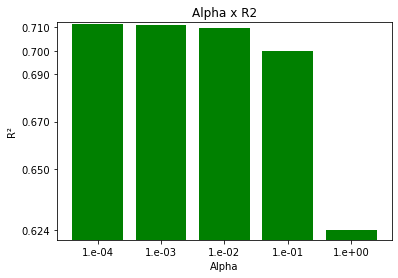

In [15]:
plt.bar(['1.e-04', '1.e-03', '1.e-02', '1.e-01', '1.e+00'], R2, color="green")
plt.xticks(['1.e-04', '1.e-03', '1.e-02', '1.e-01', '1.e+00'])
plt.yticks([0.624, 0.65, 0.67, 0.69, 0.70, 0.71])
plt.ylim([0.62, 0.712])

# A label para o eixo Y
plt.ylabel('R²')

# A label para o eixo X
plt.xlabel("Alpha")

# O título do gráfico
plt.title('Alpha x R2')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

### b) Mostre o mesmo para normalize=False.

In [16]:
R2_false = []
for a in valores_alpha:
    ridge = Ridge(alpha=a, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    R2_false.append(ridge.score(X_test, y_test))

In [17]:
R2_false

[0.7112250981524468,
 0.711216928951723,
 0.711135163316331,
 0.710317820639133,
 0.7041586727559437]

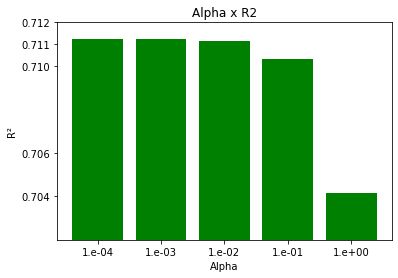

In [18]:
plt.bar(['1.e-04', '1.e-03', '1.e-02', '1.e-01', '1.e+00'], R2_false, color="green")
plt.xticks(['1.e-04', '1.e-03', '1.e-02', '1.e-01', '1.e+00'])
plt.yticks([0.704, 0.706, 0.710, 0.711, 0.712])
plt.ylim([0.702, 0.712])

# A label para o eixo Y
plt.ylabel('R²')

# A label para o eixo X
plt.xlabel("Alpha")

# O título do gráfico
plt.title('Alpha x R2')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

### c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [19]:
max_R2 = max(R2)
max_R2_false = max(R2_false)

if max_R2 > max_R2_false:
    max_idx = R2.index(max_R2)
    norm_ans = True
else:
    max_idx = R2_false.index(max_R2_false)
    norm_ans = False

print(max_idx)
print(norm_ans)

0
False


In [20]:
#print(valores_alpha[max_idx])
#print(norm_ans)

ridge = Ridge(alpha=valores_alpha[max_idx], normalize=norm_ans, max_iter=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.7112250981524468

## Questão 3 - Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database (link alternativo no Kaggle)". 

In [21]:
diabetes = pd.read_csv("dataset/diabetes.csv")
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### item 1 - Separe os dados em treino (80%) e teste (20%).

In [22]:
y = diabetes['Outcome'].values
X = diabetes.copy()
del X['Outcome']
X = X.values
print(y.shape)
print(X.shape)

(768,)
(768, 8)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
valores_alpha = np.logspace(-7, 7, 5)
valores_alpha

array([1.00000000e-07, 3.16227766e-04, 1.00000000e+00, 3.16227766e+03,
       1.00000000e+07])

### item 2 - Use o algoritmo __LogisticRegression__.

### penalty='none'

In [24]:
lr_none = LogisticRegression(penalty='none')
lr_none.fit(X_train, y_train)
y_pred = lr_none.predict(X_test)
#score.append(lr.score(X_test, y_test))
score = metrics.accuracy_score(y_test, y_pred)
print(lr_none.coef_[0])

[ 0.05973423  0.03578764 -0.01417207  0.00440241 -0.00212616  0.10549724
  0.94935471  0.03527163]


In [25]:
score = []
#print(valores_alpha)
for a in valores_alpha:
    lr = LogisticRegression(penalty='none', C=(1/a))
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    #score.append(lr.score(X_test, y_test))
    score.append(metrics.accuracy_score(y_test, y_pred))
score

[0.7597402597402597,
 0.7597402597402597,
 0.7597402597402597,
 0.7597402597402597,
 0.7597402597402597]

### penalty='l1'

In [26]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#score.append(lr.score(X_test, y_test))
score = metrics.accuracy_score(y_test, y_pred)
print(lr.coef_[0])

[ 0.06378557  0.03229646 -0.01463462  0.00303176 -0.00161999  0.09417762
  0.54758975  0.03448149]


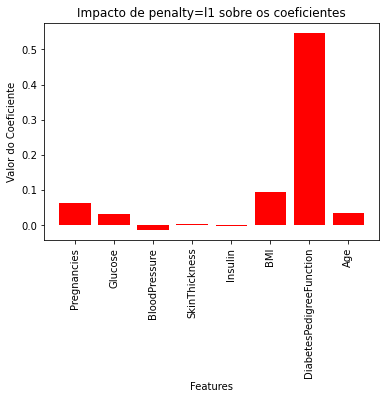

In [27]:
plt.bar(diabetes.columns[:-1].values, lr.coef_[0], color="red")
plt.xticks(diabetes.columns[:-1].values, rotation=90)
#plt.yticks([0.704, 0.706, 0.710, 0.711, 0.712])
#plt.ylim([0.702, 0.712])

# A label para o eixo Y
plt.ylabel('Valor do Coeficiente')

# A label para o eixo X
plt.xlabel("Features")

# O título do gráfico
plt.title('Impacto de penalty=l1 sobre os coeficientes')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

In [28]:
score = []
#print(valores_alpha)
for a in valores_alpha:
    lr = LogisticRegression(penalty='l1', C=(1/a), solver='liblinear')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    #score.append(lr.score(X_test, y_test))
    score.append(metrics.accuracy_score(y_test, y_pred))
score

[0.7532467532467533,
 0.7532467532467533,
 0.7532467532467533,
 0.6428571428571429,
 0.6428571428571429]

### penalty='l2'

In [29]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#score.append(lr.score(X_test, y_test))
score = metrics.accuracy_score(y_test, y_pred)
print(lr.coef_[0])

[ 0.05751072  0.0340953  -0.01426805  0.00439296 -0.00186568  0.09973223
  0.60626     0.03689671]


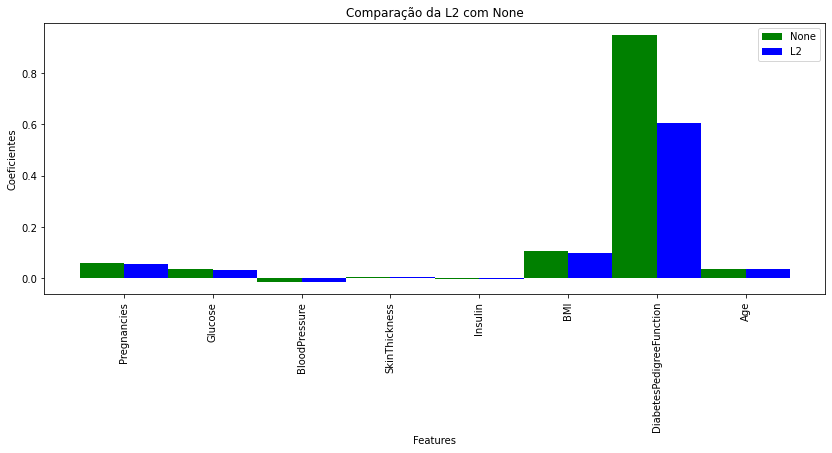

In [30]:
plt.figure(figsize = (14, 5))

barWidth = 0.5

p1 = np.arange(len(lr_none.coef_[0]))
p2 = [p + barWidth for p in p1]


plt.bar(p1, lr_none.coef_[0], color='green', width=barWidth, label='None')
plt.bar(p2, lr.coef_[0], color='blue', width=barWidth, label='L2')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Coeficientes')
plt.title('Comparação da L2 com None')
plt.xticks((p1+p2)/2, diabetes.columns[:-1], rotation=90)
plt.show()

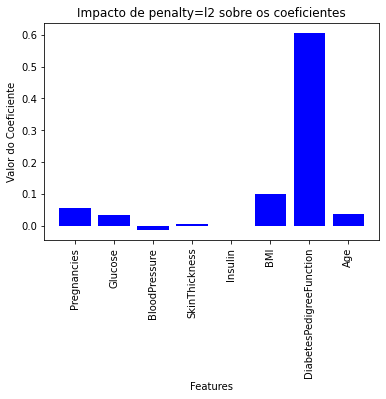

In [31]:
plt.bar(diabetes.columns[:-1].values, lr.coef_[0], color="blue")
plt.xticks(diabetes.columns[:-1].values, rotation=90)
#plt.yticks([0.704, 0.706, 0.710, 0.711, 0.712])
#plt.ylim([0.702, 0.712])

# A label para o eixo Y
plt.ylabel('Valor do Coeficiente')

# A label para o eixo X
plt.xlabel("Features")

# O título do gráfico
plt.title('Impacto de penalty=l2 sobre os coeficientes')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

In [32]:
score = []
#print(valores_alpha)
for a in valores_alpha:
    lr = LogisticRegression(penalty='l2', C=(1/a))
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    #score.append(lr.score(X_test, y_test))
    score.append(metrics.accuracy_score(y_test, y_pred))
score

[0.7727272727272727,
 0.7597402597402597,
 0.7467532467532467,
 0.7792207792207793,
 0.6428571428571429]

### penalty='elasticnet'

In [33]:
score = []
#print(valores_alpha)
for a in valores_alpha:
    lr = LogisticRegression(penalty='elasticnet', C=(1/a), solver='saga', l1_ratio=0.88)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    #score.append(lr.score(X_test, y_test))
    score.append(metrics.accuracy_score(y_test, y_pred))
score

[0.6948051948051948,
 0.6948051948051948,
 0.6948051948051948,
 0.6428571428571429,
 0.6428571428571429]